<a href="https://colab.research.google.com/github/GildasTaliah/Fin_Analysis-Mod_with_py/blob/main/EstimatingCostOfEquity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTIMATING THE COST OF EQUITY**

___

# Intro

There are two main types of instruments in the financial markets, cash instruments such as stocks and bonds, and derivatives whose value depends on an underlying asset such as stock or bonds. The analysis and valuation of different types of financial instruments requires different set of quantitative tools. Our focus (not-exhausively) in here is on the valuation of stocks.

Equity instruments enable investors to purchase a share of a company and secure the right to enjoy future profits realised thereof. Some equities pay periodic payments as dividends, whereas others might forgo dividend and rely on prices appreciation inorder to generate returns across time.

Equities may be public or private and arise when companies issue securities (i.e stocks) to investors after computing a fair value or proper valuation.


Equity embeds a significant amount of risk as they are the last to be re-paid in the event of bankruptcy, due to this it is natural to think that equity investors would be expected to be paid a premium for taking additional risk. This idea is described and commonly referred to as **Equity Risk Premium**.

Cost of Equity is the rate of return that a company must pay to its investors to compensate them for their investment risk.


# Problem Statment

The process of estimating cost of equity using historical prices data is straightforwward: calculate stock returns, run the Capital Asset Pricing Model (**CAPM**) regression, then take the coefficient of the Market Return as Beta - $\beta$, then plug the $\beta$ into the CAPM to estimate the future cost of equity based on an expected market return and risk free rate.

Mathematically, the CAPM is represented as:

$$ E[R_{i}] =  R_{f} \quad + \quad \beta_{i} (E[R_{m}] - rf).$$

where $\quad E[R_{i}] \quad$ is the expected return of stock $i$, $ \quad R_{f} \quad$ is the risk-free rate,  $\quad \beta_{i} \quad$ is the sensitivity of stock return $i$ to market return, $ \quad R_{m} \quad$ is the expected return of the market, $\quad (E[R_{m}] - rf) \quad$ is the market risk premium (MRP).

\\
 **Beta** a measure of systematic risk, is typically estimated using the market regression model:
$$R_{i,t} = \alpha + \beta  \, x \, R_{m,t} \; + \; \epsilon$$
Where $\alpha \quad and \quad \beta$ are the coefficients generated by the regression, $ \, t \in (1, 2, 3, \ldots T)$, and $\epsilon $ an error term.

\\
The regression is typically performed using 2 - 5 years data using weekly or monthly returns data.



## Download Price Data

Let us compute the beta of Apple. We start with downloading data from yahoo.

In [174]:
import yfinance as yf

# Download Apple stock data and S&P/ Market data.
lst = ['AAPL','^GSPC']
stocks = yf.download(lst, start = '2018-01-01', end = '2024-05-30', period = '1mo')['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [175]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1612 entries, 2018-01-02 to 2024-05-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1612 non-null   float64
 1   ^GSPC   1612 non-null   float64
dtypes: float64(2)
memory usage: 37.8 KB


In [176]:
# @title Compute returns
import pandas as pd
rets = stocks.resample('M').last().pct_change().dropna()

In [177]:
rets.head()

Ticker,AAPL,^GSPC
Date,,
2018-02-28,0.068185,-0.038947
2018-03-31,-0.058051,-0.026884
2018-04-30,-0.015019,0.002719
2018-05-31,0.135124,0.021608
2018-06-30,-0.009418,0.004842


In [178]:
rets.describe()

Ticker,AAPL,^GSPC
count,76.000000,76.000000
mean,0.024693,0.009539
std,0.088193,0.051221
min,-0.181198,-0.125119
25%,-0.044412,-0.026305
50%,0.028485,0.018156
75%,0.095876,0.042732
max,0.216569,0.126844


<Axes: xlabel='Date'>

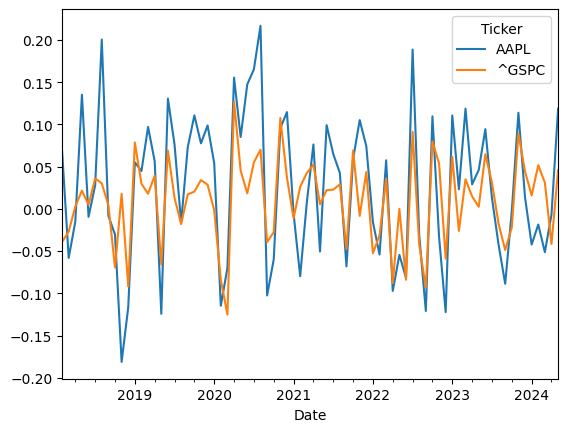

In [ ]:
rets.plot()

## Compute Beta

In [ ]:
# Risk frees rate
risk_free = 0.025

# Compute Market Risk Premium
rets['MRP'] = rets['^GSPC'] - risk_free
rets.head()

Ticker,AAPL,^GSPC,MRP
Date,,,
2018-02-28,0.068185,-0.038947,-0.063947
2018-03-31,-0.058051,-0.026884,-0.051884
2018-04-30,-0.015019,0.002719,-0.022281
2018-05-31,0.135124,0.021608,-0.003392
2018-06-30,-0.009418,0.004842,-0.020158


We are now ready to run a regression. We can use statsmodels to run the OLS, we will aslo add a constant to have an intercept in the regression.

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(rets['^GSPC'])
y = rets['AAPL']

# Create model and fit model
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     78.28
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.23e-13
Time:                        21:02:25   Log-Likelihood:                 104.63
No. Observations:                  76   AIC:                            -205.3
Df Residuals:                      74   BIC:                            -200.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0129      0.007      1.788      0.078      -0.001       0.027
^GSPC          1.2345      0.140      8.847      0.000       0.956       1.513
==============================================================================
Omnibus:                        5.006   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                5.059
Skew:                          -0.324   Prob(JB):                       0.0797
Kurtosis:                       4.085   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
beta = results.params['^GSPC']
beta

1.2344835312691769

In [ ]:
rets['^GSPC'].cov(rets['AAPL']) / rets['^GSPC'].var()

1.2344835312691764

The current beta value on [Yahoo](https://finance.yahoo.com/quote/AAPL/) is 1.26 as of the date of this analysis.
We proceed to compute cost of equity.

## Compute Cost of Equity

Recall the CAPM formula:

$$ E[R_{i}] =  R_{f} \, + \, \beta_{i} \,(E[R_{m}] - R_{f}).$$

\\

We need to compute the the expected return of the stock and the expected return of the market return


In [ ]:
stock_return = rets['AAPL'].mean()
stock_return

0.024693082752557122

In [ ]:

market_return = rets['^GSPC'].mean()
market_return

0.009538722383033276

In [179]:
cost_of_eq = risk_free + beta * ( market_return - risk_free )
cost_of_eq

0.005913307409473836

In [180]:
print(f'The cost of equity is {cost_of_eq:.2%}.')

The cost of equity is 0.59%.


# Automation

Now we automate the process above to compute the cost of equity for a given pair of stocks. We start with defining a custom function to download stock prices.

In [ ]:
# @title Download data
import datetime as dt
import pandas as pd

St = dt.datetime(2018, 1, 1)
Sp = dt.datetime(2024, 3, 31)
def read_data(ticker_list, start = St, end = Sp):

  '''
  This function takes in a list of tickers - ticker_list, downloads historical
  prices from yahoo for the (default) timeframe - St, Sp.  Extracts the closing
  prices for each ticker and returns a dataframe with the merged data.
  '''

  DataFrame = pd.DataFrame()
  for tick in ticker_list:
    stock = yf.Ticker(tick)
    prices = stock.history(start=start, end=end)
    # Change the index to date-only
    prices.index = pd.to_datetime(prices.index)
    closing_prices = prices['Close']
    DataFrame[tick] = closing_prices

  DataFrame.index = pd.to_datetime(DataFrame.index)

  # Set 'Date' column as the index
  #DataFrame.set_index('Date', inplace=True)

  return DataFrame

In [ ]:
# @title Ticker symbols
# QQQ (NASDAQ-100 ETF), MSFT (Microsoft),  NVDA (NVIDIA), AMZN (Amazon)....
# ^GDAXI(DAX Index), SAP.DE (SAP SE), SIE.DE (Siemens AG), AIR.PA (Airbus SE)...
stocks = ['^GSPC', 'AAPL', 'MSFT', 'NVDA', 'AMZN', 'AMD', 'SMCI', 'MET', 'TRGP', 'PANW', 'BX',  'CINF',]
stocksde = ['^GDAXI','SAP.DE', 'SIE.DE', 'AIR.PA', "BMW.DE", "BC8.DE", "BNR.DE", 'DB1.DE', 'SHL.DE', 'MTX.DE', 'QIA.DE']
tickers = {'stk_us': stocks, 'stk_de': stocksde}

In [ ]:
# Download
returns_dict = {key:read_data(item).resample('M').last().pct_change().dropna() \
                for key, item in tickers.items()}

In [ ]:
returns_dict['stk_us'].mean()

^GSPC    0.009738
AAPL     0.023847
MSFT     0.023071
NVDA     0.047740
AMZN     0.016669
AMD      0.048622
SMCI     0.071517
MET      0.012592
TRGP     0.034572
PANW     0.028742
BX       0.026426
CINF     0.011767
dtype: float64

In [ ]:
returns_dict['stk_us'].corr()

,^GSPC,AAPL,MSFT,NVDA,AMZN,AMD,SMCI,MET,TRGP,PANW,BX,CINF
^GSPC,1.000000,0.715395,0.758928,0.629459,0.669694,0.600756,0.341646,0.636907,0.621937,0.529379,0.762549,0.406280
AAPL,0.715395,1.000000,0.673767,0.608139,0.644806,0.521817,0.161870,0.208610,0.358041,0.553763,0.509057,0.163930
MSFT,0.758928,0.673767,1.000000,0.642334,0.684587,0.601560,0.304455,0.203734,0.327782,0.415975,0.554639,0.178702
NVDA,0.629459,0.608139,0.642334,1.000000,0.625091,0.643062,0.485008,0.087910,0.241790,0.435513,0.496264,0.156970
AMZN,0.669694,0.644806,0.684587,0.625091,1.000000,0.661736,0.264949,0.177209,0.320810,0.432541,0.547608,0.040953
AMD,0.600756,0.521817,0.601560,0.643062,0.661736,1.000000,0.426819,0.121183,0.159170,0.421971,0.502792,0.138814
SMCI,0.341646,0.161870,0.304455,0.485008,0.264949,0.426819,1.000000,0.093709,0.141226,0.326840,0.151641,0.079422
MET,0.636907,0.208610,0.203734,0.087910,0.177209,0.121183,0.093709,1.000000,0.647641,0.328008,0.520638,0.534076
TRGP,0.621937,0.358041,0.327782,0.241790,0.320810,0.159170,0.141226,0.647641,1.000000,0.396686,0.443234,0.145941
PANW,0.529379,0.553763,0.415975,0.435513,0.432541,0.421971,0.326840,0.328008,0.396686,1.000000,0.409608,0.208792


In [ ]:
returns_dict['stk_de'].mean()


^GDAXI    0.006845
SAP.DE    0.013699
SIE.DE    0.014607
AIR.PA    0.014375
BMW.DE    0.010048
BC8.DE    0.015662
BNR.DE    0.011648
DB1.DE    0.010856
SHL.DE    0.011680
MTX.DE    0.013327
QIA.DE    0.008233
dtype: float64

In [ ]:
returns_dict['stk_de'].corr()

,^GDAXI,SAP.DE,SIE.DE,AIR.PA,BMW.DE,BC8.DE,BNR.DE,DB1.DE,SHL.DE,MTX.DE,QIA.DE
^GDAXI,1.000000,0.706751,0.822693,0.749556,0.795359,0.485326,0.720454,0.584941,0.465501,0.643032,0.077658
SAP.DE,0.706751,1.000000,0.547346,0.473855,0.379682,0.538760,0.485363,0.465080,0.386609,0.416461,0.218589
SIE.DE,0.822693,0.547346,1.000000,0.481364,0.682889,0.437774,0.634820,0.458725,0.624270,0.416001,0.227349
AIR.PA,0.749556,0.473855,0.481364,1.000000,0.563196,0.265788,0.545124,0.360447,0.195267,0.816959,-0.041096
BMW.DE,0.795359,0.379682,0.682889,0.563196,1.000000,0.250429,0.581712,0.413921,0.304811,0.442994,0.011048
BC8.DE,0.485326,0.538760,0.437774,0.265788,0.250429,1.000000,0.551673,0.376743,0.421449,0.281844,0.384950
BNR.DE,0.720454,0.485363,0.634820,0.545124,0.581712,0.551673,1.000000,0.373292,0.455879,0.517777,0.192824
DB1.DE,0.584941,0.465080,0.458725,0.360447,0.413921,0.376743,0.373292,1.000000,0.189883,0.412466,0.053333
SHL.DE,0.465501,0.386609,0.624270,0.195267,0.304811,0.421449,0.455879,0.189883,1.000000,0.182932,0.344311
MTX.DE,0.643032,0.416461,0.416001,0.816959,0.442994,0.281844,0.517777,0.412466,0.182932,1.000000,-0.016486


In [ ]:
# @title Cost of Equity function
import numpy as np


def cost_of_equity(returns_df, risk_free = 0.025 ):

  '''
  Input: Returns data frame and risk free rate. First column must be market return

  Output: cost of equity based on CAPM.
  '''

  # Market Return
  mret = returns_df.iloc[:, 0]
  rets = returns_df.iloc[:, 1:]

  # Create dict to store results
  #results = pd.DataFrame()
  results = {}


  # Compute Market Risk Premium and add constant
  #MRP = mret - risk_free
  X = sm.add_constant(mret)

  # Compute expected market return
  exp_mret = np.mean(mret)


  # Loop through rets
  for col in rets.columns:

    y = rets[col]

    # Create and fit model
    model = sm.OLS(y, X).fit()

    # Obtain beta and r_squared
    beta, rsq = model.params[1], model.rsquared

    # Compute cost of equity and append results
    cost_of_eq = risk_free + beta * (exp_mret - risk_free)
    results[col] = pd.DataFrame( {'Beta': beta, 'R_sq': rsq, 'Cost Of Equity': cost_of_eq}, index = [0])

  return pd.concat(results)




In [ ]:
cost_of_eq = {key: cost_of_equity(df) for key, df in returns_dict.items()}

In [ ]:
coe = pd.concat(cost_of_eq).sort_values(by = 'R_sq', ascending = False)
coe

Beta      R_sq  Cost Of Equity
stk_de SIE.DE 0  1.213462  0.676824        0.002970
       BMW.DE 0  1.230037  0.632596        0.002669
stk_us BX     0  1.531237  0.581481        0.001631
       MSFT   0  0.897026  0.575971        0.011310
stk_de AIR.PA 0  1.459426  0.561834       -0.001496
       BNR.DE 0  0.977991  0.519053        0.007245
stk_us AAPL   0  1.233727  0.511790        0.006171
stk_de SAP.DE 0  1.010761  0.499497        0.006650
stk_us AMZN   0  1.222454  0.448491        0.006343
stk_de MTX.DE 0  1.239878  0.413490        0.002490
stk_us MET    0  1.056705  0.405650        0.008873
       NVDA   0  1.794814  0.396219       -0.002392
       TRGP   0  2.154851  0.386806       -0.007887
       AMD    0  1.928390  0.360908       -0.004431
stk_de DB1.DE 0  0.613734  0.342156        0.013858
stk_us PANW   0  1.118219  0.280242        0.007934
stk_de BC8.DE 0  0.843930  0.235541        0.009679
       SHL.DE 0  0.606442  0.216691        0.013990
stk_us CINF   0  0.618655  0.165064        0.015558
       SMCI   0  1.479395  0.116722        0.002422
stk_de QIA.DE 0  0.116255  0.006031        0.022889

# References


- [DataCamp Course: Equity Valuation in R](https://app.datacamp.com/learn/courses/equity-valuation-in-r)
- [Nick DeRobertis: Financial Modelling Course](https://nickderobertis.github.io/fin-model-course/index.html#)
- [Investopedia: CAPM](https://www.investopedia.com/terms/c/capm.asp#:~:text=The%20capital%20asset%20pricing%20model%2C%20or%20CAPM%2C%20is%20a%20financial,to%20the%20market%20(beta))